https://github.com/utiasSTARS/pykitti/blob/master/pykitti/odometry.py

https://zhuanlan.zhihu.com/p/493026799

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pyquaternion
import json
import open3d as o3d
from PIL import Image
from projector import Projector
import yaml
import cv2
from pypcd import pypcd

In [17]:
# SUSTechPOINTS data
ROOT_DIR = "/home/work/github/calibration/sensor-calibration/datas/kitti-odometry/sequences/00"
IMG = ROOT_DIR + "/image_2/000001.png"
PCD = ROOT_DIR + "/velodyne/000001.bin"
CALIB_FILE1 = ROOT_DIR + "/calib.txt"

In [21]:
def read_calib_file(filepath):
    """Read in a calibration file and parse into a dictionary."""
    data = {}

    with open(filepath, 'r') as f:
        for line in f.readlines():
            key, value = line.split(':', 1)
            # The only non-float values in these files are dates, which
            # we don't care about anyway
            try:
                data[key] = np.array([float(x) for x in value.split()])
            except ValueError:
                pass
    return data
filedata = read_calib_file(CALIB_FILE1)
T2 = np.eye(4)
P_rect_20 = np.reshape(filedata['P2'], (3, 4))
T2[0, 3] = P_rect_20[0, 3] / P_rect_20[0, 0]
T_cam0_velo = np.reshape(filedata['Tr'], (3, 4))
T_cam0_velo = np.vstack([T_cam0_velo, [0, 0, 0, 1]])
T_cam2_velo = T2.dot(T_cam0_velo)

intrinsic = P_rect_20[:, :3]
print(intrinsic)

extrinsic = T_cam2_velo
print(extrinsic)
extrinsic = Projector.inverse_rigid_trans(extrinsic)
print(extrinsic)

[[718.856    0.     607.1928]
 [  0.     718.856  185.2157]
 [  0.       0.       1.    ]]
[[ 4.27680239e-04 -9.99967248e-01 -8.08449168e-03  5.11466120e-02]
 [-7.21062651e-03  8.08119847e-03 -9.99941316e-01 -5.40398473e-02]
 [ 9.99973865e-01  4.85948581e-04 -7.20693369e-03 -2.92196865e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 4.27680239e-04 -7.21062651e-03  9.99973865e-01  2.91777693e-01]
 [-9.99967248e-01  8.08119847e-03  4.85948581e-04  5.17236362e-02]
 [-8.08449168e-03 -9.99941316e-01 -7.20693369e-03 -5.57290251e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]


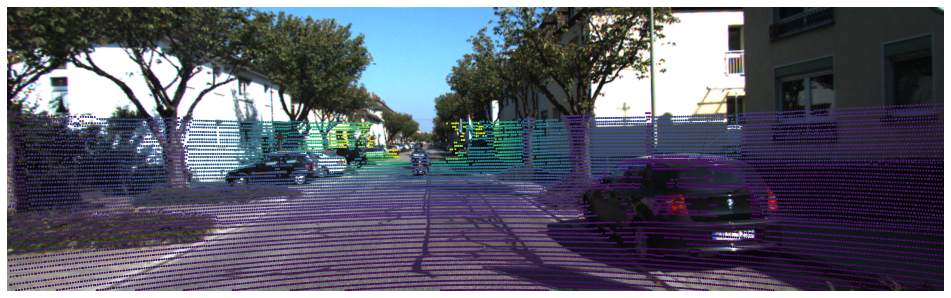

In [19]:
img = Image.open(IMG)
scan = np.fromfile(PCD, dtype=np.float32)
pts = scan.reshape((-1, 4))

points, coloring = Projector.map_pointcloud_to_image(img, pts, extrinsic, intrinsic)

fig, ax = plt.subplots(1, 1)
w, h = img.size
fig.set_size_inches(w/fig.dpi, h/fig.dpi)
ax.imshow(img)
ax.scatter(points[0, :], points[1, :], c=coloring, s=1)
ax.axis('off')
plt.savefig("./imgs/kitti_point_img.png")
plt.show()

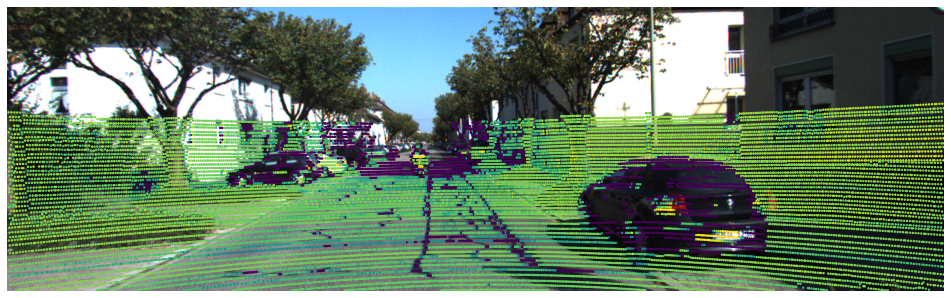

In [20]:
points, coloring = Projector.map_pointcloud_to_image(img, pts, extrinsic, intrinsic, coloring=Projector.Coloring.INTENSITY)

fig, ax = plt.subplots(1, 1)
w, h = img.size
fig.set_size_inches(w/fig.dpi, h/fig.dpi)
ax.imshow(img)
ax.scatter(points[0, :], points[1, :], c=coloring, s=2)
ax.axis('off')
plt.savefig("./imgs/kitti_point_img2.png")
plt.show()